# Toyota Corolla Price Prediction  
### Multiple Linear Regression Mini Project

This project predicts the **price of Toyota Corolla cars**
using **Multiple Linear Regression** techniques.


## Environment Setup

In [1]:
import sys
import os

# Add src folder to Python path
sys.path.append(os.path.abspath("src"))

print("src folder added to Python path")


src folder added to Python path


## Import Required Modules

In [2]:
import pandas as pd

from eda import run_eda
from preprocess import preprocess_data
from train_models import train_models
from evaluate import evaluate_all_models
from regularization import train_regularization_models


## Load Raw Dataset

The Toyota Corolla dataset is loaded from the data folder.


In [3]:
df_raw = pd.read_csv("data/raw/ToyotaCorolla - MLR.csv")
df_raw.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## Exploratory Data Analysis (EDA)

EDA is used to understand the data distribution,
missing values, and relationships between variables.


In [4]:
run_eda(df_raw)


[INFO] Starting Exploratory Data Analysis...
[INFO] Created directory: output
[INFO] Created directory: output\plots
[INFO] Generating dataset summary...
[INFO] EDA report saved at: output\eda_report.txt
[INFO] Creating histograms...
[INFO] Plot saved: output\plots\histogram_Price.png
[INFO] Plot saved: output\plots\histogram_Age_08_04.png
[INFO] Plot saved: output\plots\histogram_KM.png
[INFO] Plot saved: output\plots\histogram_HP.png
[INFO] Plot saved: output\plots\histogram_Automatic.png
[INFO] Plot saved: output\plots\histogram_cc.png
[INFO] Plot saved: output\plots\histogram_Doors.png
[INFO] Plot saved: output\plots\histogram_Cylinders.png
[INFO] Plot saved: output\plots\histogram_Gears.png
[INFO] Plot saved: output\plots\histogram_Weight.png
[INFO] Creating boxplots...
[INFO] Plot saved: output\plots\boxplot_Price.png
[INFO] Plot saved: output\plots\boxplot_Age_08_04.png
[INFO] Plot saved: output\plots\boxplot_KM.png
[INFO] Plot saved: output\plots\boxplot_HP.png
[INFO] Plot sav

### EDA Plots

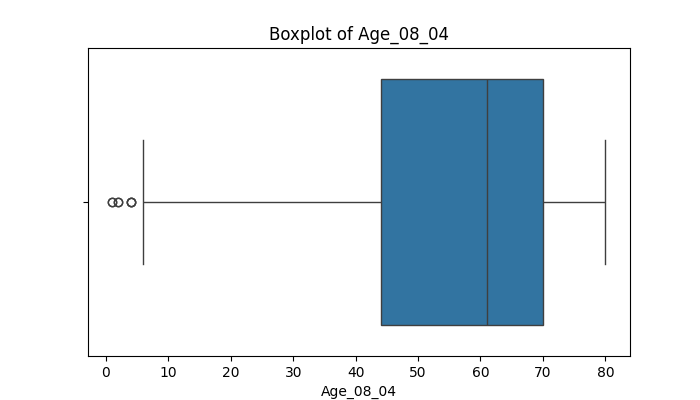

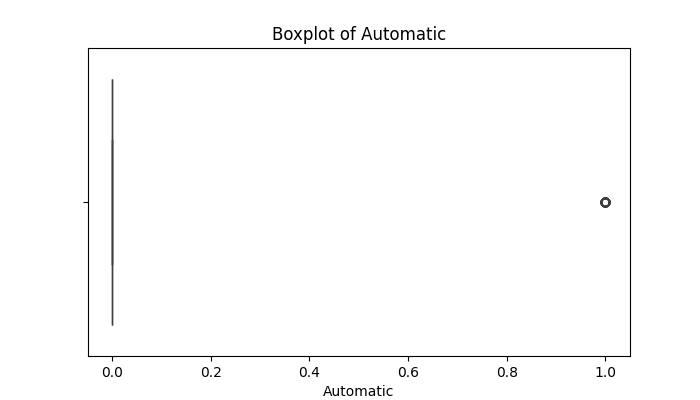

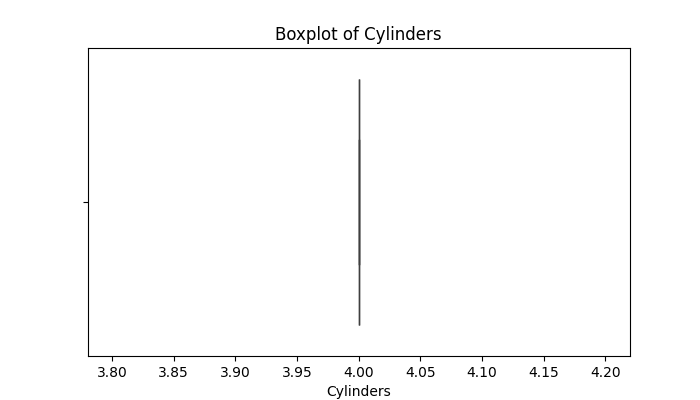

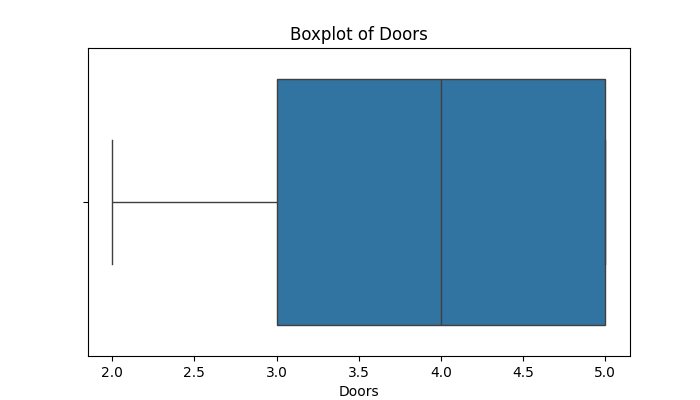

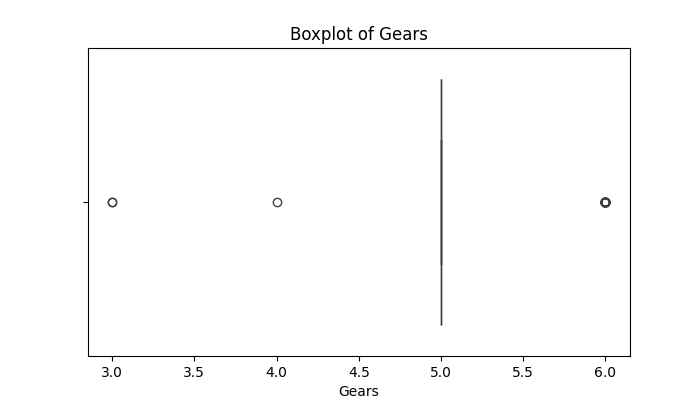

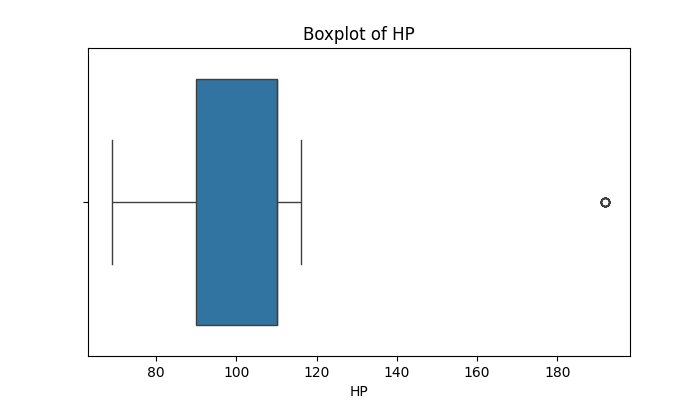

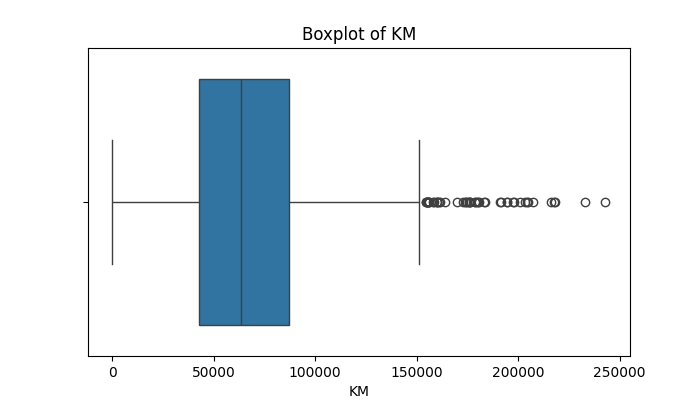

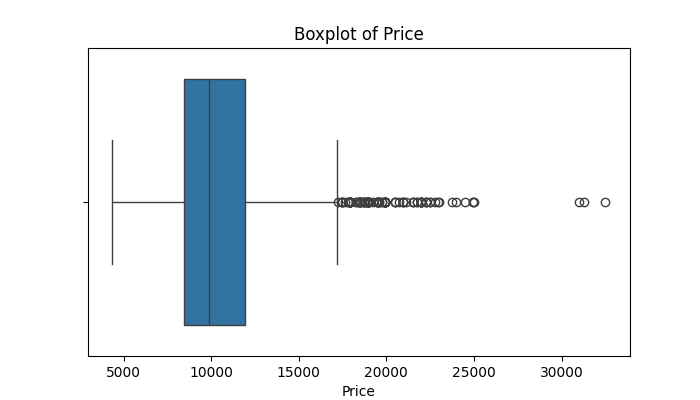

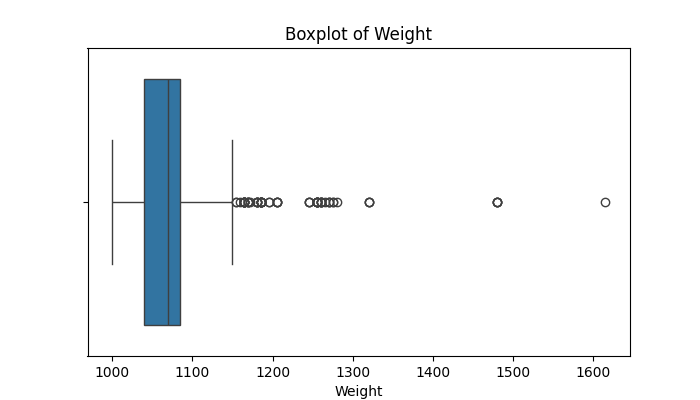

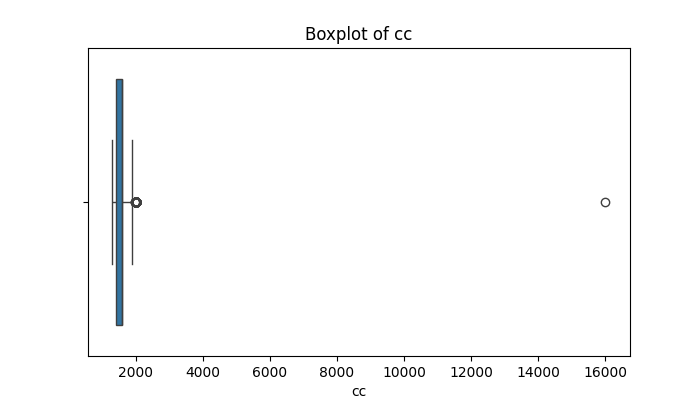

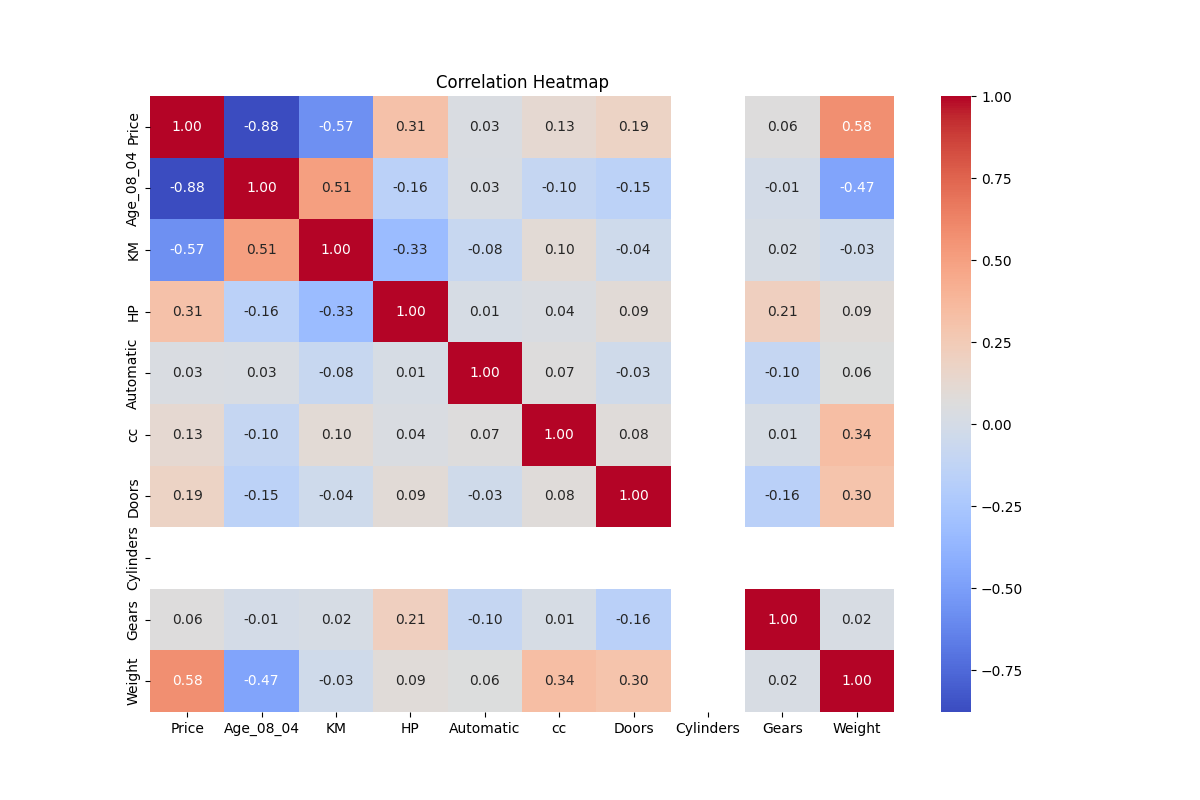

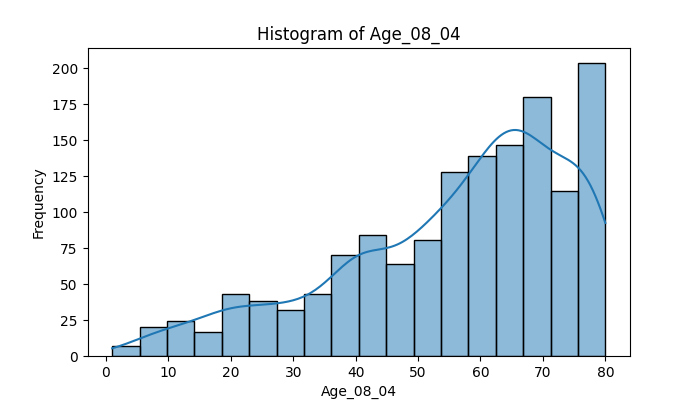

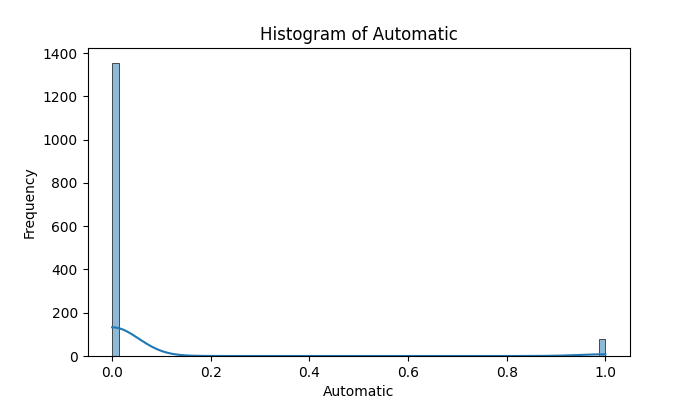

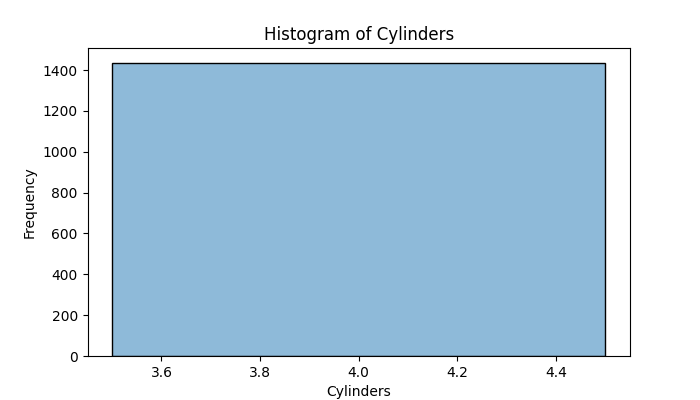

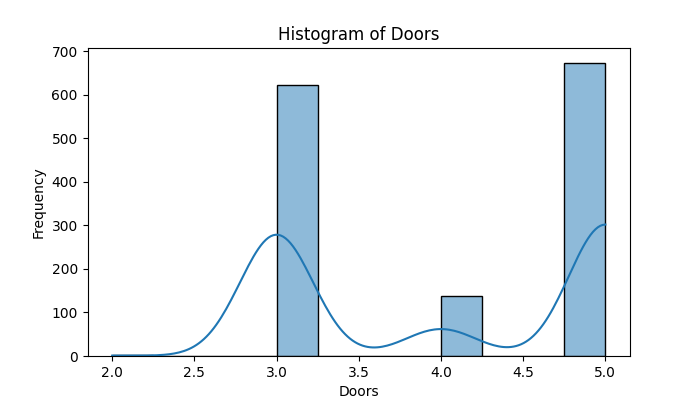

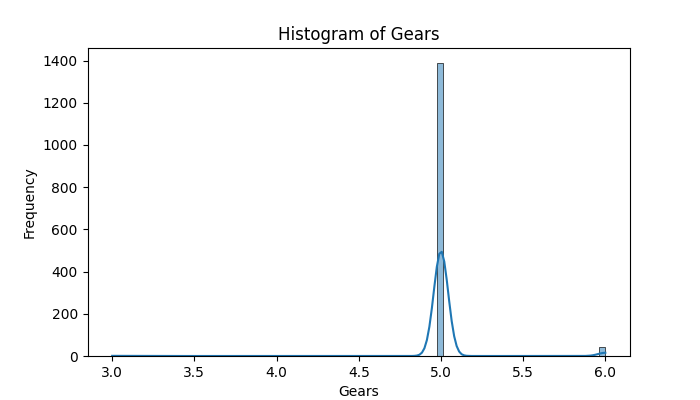

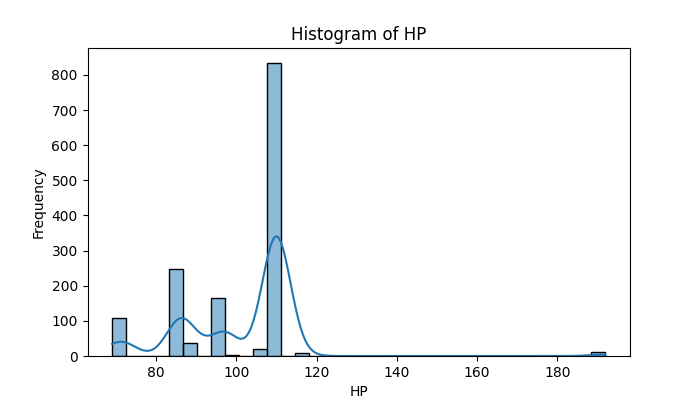

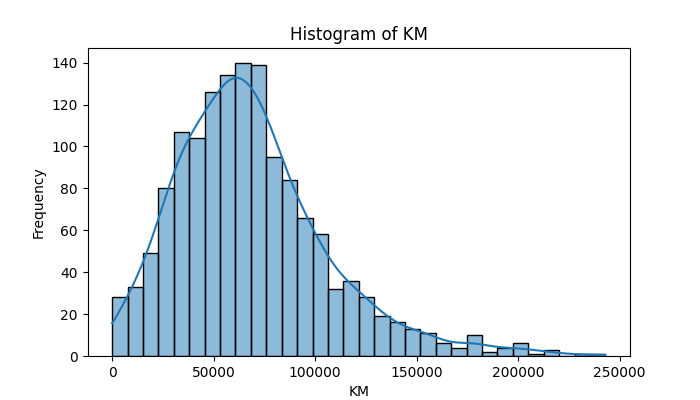

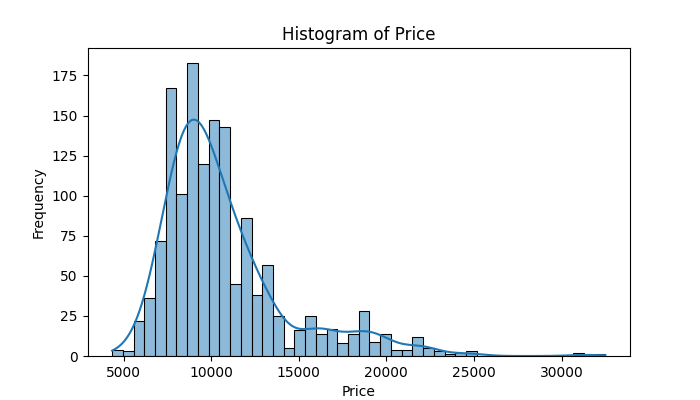

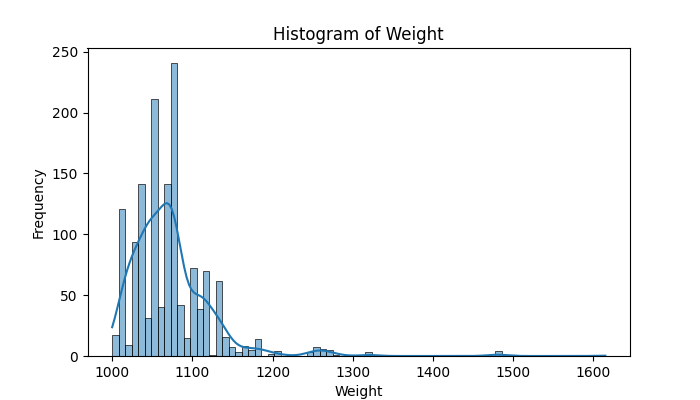

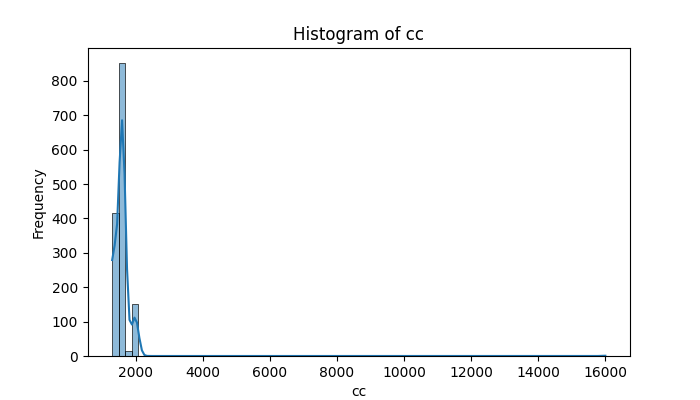

In [5]:
from IPython.display import Image, display
import os

plots_dir = "output/plots"

for file in sorted(os.listdir(plots_dir)):
    if file.endswith(".png"):
        display(Image(filename=os.path.join(plots_dir, file)))

## Data Preprocessing

In this step, the dataset is cleaned by:
- Removing duplicates
- Handling missing values
- Encoding categorical variables


In [6]:
cleaned_df = preprocess_data(df_raw)
cleaned_df.head()


[INFO] Starting Data Preprocessing...
[INFO] Removing duplicate rows if any...
[INFO] Removed 1 duplicate rows.
[INFO] Checking missing values...
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64
[INFO] Filling numeric missing values with median...
[INFO] Filling categorical missing values with mode...
[INFO] Cleaning 'Doors' column...
[INFO] Applying One-Hot Encoding on Fuel_Type...
[INFO] Created directory: data/processed
[INFO] Saving cleaned dataset to: data/processed/cleaned_data.csv
[INFO] Preprocessing Completed Successfully!


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


## Model Training

Three regression models are trained:
1. Basic Linear Regression  
2. Reduced Model (VIF based)  
3. Scaled Model  


In [7]:
train_models(cleaned_df)


[INFO] Starting Model Training...
[INFO] Splitting features and target column...
[INFO] Performing train-test split...
[INFO] Training model_1_basic ...
[INFO] Created directory: models
[INFO] Saved model_1_basic at models\model_1_basic.pkl

[INFO] Calculating VIF and removing multicollinear features...
[INFO] Calculating VIF values...
[INFO] High VIF features to remove: ['Cylinders', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
[INFO] Training model_2_reduced ...
[INFO] Saved model_2_reduced at models\model_2_reduced.pkl

[INFO] Training scaled model (StandardScaler)...
[INFO] Training model_3_scaled ...
[INFO] Saved model_3_scaled at models\model_3_scaled.pkl

[INFO] Saving coefficient summary at: output\coefficient_summary.txt

[INFO] Training Completed Successfully!



{'model_1': LinearRegression(),
 'model_2': LinearRegression(),
 'model_3': LinearRegression()}

## Model Evaluation

Models are evaluated using:
- MAE
- MSE
- RMSE
- R² score


In [8]:
results = evaluate_all_models(cleaned_df)

for model, scores in results.items():
    print(model, "→ MAE, MSE, RMSE, R2 =", scores)


[INFO] Starting model evaluation...
[INFO] Performing train-test split for evaluation...
[INFO] Loading trained models...
[INFO] Preparing reduced test features (VIF < 10)...
[INFO] Calculating VIF values...
[INFO] Evaluating models...
[INFO] Saving evaluation report at: output\evaluation_results.txt

[INFO] Evaluation completed successfully!

model_1 → MAE, MSE, RMSE, R2 = (986.4966877482508, 2155628.35613962, 1468.2058289421207, 0.8203213869961811)
model_2 → MAE, MSE, RMSE, R2 = (989.7280729258206, 1926044.8285001263, 1387.820171528043, 0.8394579184382996)
model_3 → MAE, MSE, RMSE, R2 = (986.4966877482528, 2155628.356139624, 1468.2058289421223, 0.8203213869961807)


## Lasso and Ridge Regularization

Regularization helps reduce overfitting and multicollinearity.


In [9]:
train_regularization_models(cleaned_df)


[INFO] Starting Lasso and Ridge Regression Training...
[INFO] Performing train-test split for regularization models...
[INFO] Scaling features before regularization...
[INFO] Saved scaler used for regularization models at: models\regularization_scaler.pkl
[INFO] Training LassoCV model...
[INFO] Lasso model saved at: models\lasso_model.pkl
[INFO] Training RidgeCV model...
[INFO] Ridge model saved at: models\ridge_model.pkl
[INFO] Saving regularization summary at: output\regularization_summary.txt

[INFO] Lasso & Ridge Training Completed Successfully!


{'lasso_model': LassoCV(cv=5, random_state=42),
 'ridge_model': RidgeCV(alphas=[0.1, 1, 5, 10, 50, 100], cv=5)}

## Conclusion

In this project, Multiple Linear Regression was used
to predict Toyota Corolla prices.

Different models were trained and evaluated,
and regularization techniques improved model stability.
